In [1]:
from WindPy import w

w.start()  # 默认命令超时时间为120秒，如需设置超时时间可以加入waitTime参数，例如waitTime=60,即设置命令超时时间为60秒

print("WindPy是否已经登录成功:{}".format(w.isconnected()))  # 判断WindPy是否已经登录成功

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2020 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.
WindPy是否已经登录成功:True


In [2]:
import numpy as np
import scipy as sp
import pandas as pd


In [3]:
# Data Gathering
error_code, wsddata2 = w.wsd("TB1Y.WI,TB3Y.WI,TB5Y.WI,TB7Y.WI,TB10Y.WI", "close", "ED-10Y", "2020-12-20", "",usedf=True)

In [4]:
# Data Cleaning
idf=wsddata2.dropna(how="any")
idf.index=pd.to_datetime(idf.index)
idiff=idf.diff().dropna()
idiff

,TB1Y.WI,TB3Y.WI,TB5Y.WI,TB7Y.WI,TB10Y.WI
2015-01-06,0.0700,-0.0200,-0.0225,0.0000,0.0150
2015-01-07,-0.0500,0.0300,0.0125,-0.0150,-0.0200
2015-01-08,0.0400,-0.0450,-0.0025,-0.0050,0.0100
2015-01-09,-0.0500,0.0000,-0.0275,-0.0050,0.0000
2015-01-12,0.0300,0.0525,0.0225,-0.0100,-0.0150
...,...,...,...,...,...
2020-12-14,0.0000,-0.0251,-0.0212,-0.0164,-0.0087
2020-12-15,0.0125,-0.0174,-0.0163,-0.1075,-0.0094
2020-12-16,-0.0594,0.0074,-0.0088,-0.0300,0.0012
2020-12-17,-0.0531,-0.0331,0.0113,0.0424,0.0013


In [6]:
# Data Visualization
idiff[(idiff.index.year==2015) & (idiff.index.month<=12)]['TB1Y.WI'].hist(bins=30)

In [7]:
def myhist(df_input, bins=30):
    import matplotlib.pyplot as plt
    import matplotlib.style as style
    import scipy.stats as stats
    import numpy as np


    df_input = np.array(df_input)
    if df_input.ndim>1:
        if df_input.shape[0]>1:
            df_input=df_input[:,0]
        else:
            df_input=df_input[0,:]


    style.use("ggplot")
    plt.rcParams["figure.figsize"] = (6, 4)
    plt.figure(dpi=100)
    heightofbins, aa, bb = plt.hist(df_input, bins)
    mu = df_input.mean()
    std = df_input.std()
    lowb = df_input.min()
    upb = df_input.max()

    # can use stats.norm.fit to get the std, mu
    # nloc,nscale=stats.norm.fit(df_input)

    # fit the data with a t location-scale model with MLE
    ## r=loc + scale * T(dof)

    tdof, tloc, tscale = stats.t.fit(df_input)

    # Change the shape of PDF to match the hist
    ## both norm and t distribution pdf are multiplied by a same number

    ### norm distribution
    xx = stats.norm.pdf(np.linspace(lowb - std, upb + std, 1000), loc=mu, scale=std)
    xx = xx * np.max(heightofbins) / stats.t.pdf(mu, df=tdof, loc=tloc, scale=tscale)
    plt.plot(np.linspace(lowb - std, upb + std, 1000), xx)

    ### rescaled t distribution
    y = stats.t.pdf(
        np.linspace(lowb - std, upb + std, 1000), df=tdof, loc=tloc, scale=tscale
    )
    y = y * np.max(heightofbins) / stats.t.pdf(mu, df=tdof, loc=tloc, scale=tscale)
    plt.plot(np.linspace(lowb - std, upb + std, 1000), y)

    plt.legend(["Normal PDF", "Rescaled t Distribution", "Sample Distribution"])

    ### plot the sample kurtosis and skewness
    kur = stats.kurtosis(df_input)
    skew = stats.skew(df_input)
    x = mu + std
    y = 0.5 * np.max(heightofbins)
    plt.text(x, y, "Skewness:{:.2f},Kurtosis:{:.2f}".format(skew, kur))
    plt.show()


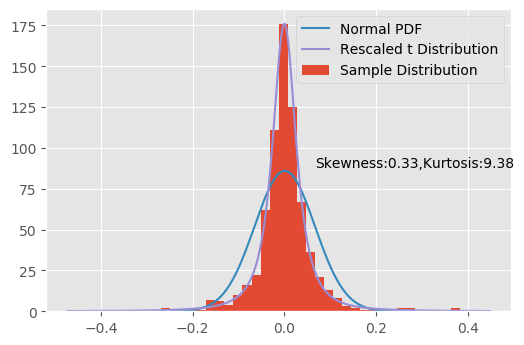

In [8]:
myhist(idiff[idiff.index.year<2018]['TB1Y.WI'],bins=40)

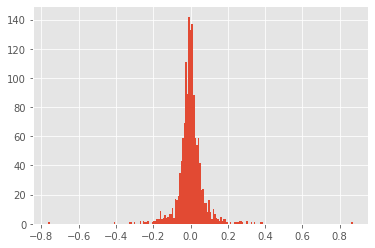

In [9]:
idiff['TB1Y.WI'].hist(bins=200)

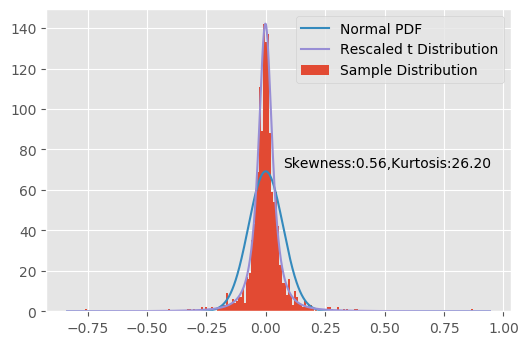

In [10]:
myhist(idiff['TB1Y.WI'],bins=200)

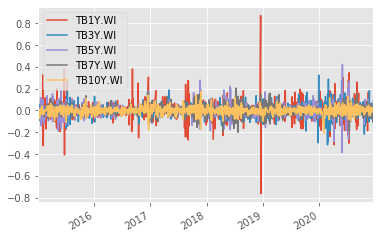

In [11]:
idiff.plot()

In [59]:
# find the row which TB1y achieves its maximum
idiff[idiff['TB1Y.WI']==idiff['TB1Y.WI'].min()]

,TB1Y.WI,TB3Y.WI,TB5Y.WI,TB7Y.WI,TB10Y.WI
2018-12-19,-0.7625,-0.04,-0.005,0.015,-0.045


In [ ]:
idiff[idiff['TB1Y.WI']==idiff['TB1Y.WI'].max()]

In [61]:
idiff.drop(index=pd.to_datetime("2018-12-18"),inplace=True)
idiff.drop(index=pd.to_datetime("2018-12-19"),inplace=True)

In [13]:
def mysig(v):
    # the std of T(v) for v>2
    return(np.sqrt(v/(v-2)))

Text(0.5, 1.0, 'For whole picture')

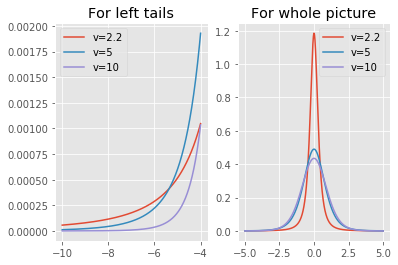

In [14]:
# rescale the t-distribution: with std set = 1
# for small v, it shows 
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.subplot(121)
x=np.linspace(-10,-4,1000)
y=stats.t.pdf(x,df=2.2, loc=0, scale=1/mysig(2.2))
y2=stats.t.pdf(x,df=5, loc=0, scale=1/mysig(5))
y3=stats.t.pdf(x,df=10, loc=0, scale=1/mysig(10))
plt.plot(x,y,x,y2,x,y3)
plt.legend(["v=2.2","v=5","v=10"])
plt.title("For left tails")

plt.subplot(122)
x=np.linspace(-5,5,1000)
y=stats.t.pdf(x,df=2.2, loc=0, scale=1/mysig(2.2))
y2=stats.t.pdf(x,df=5, loc=0, scale=1/mysig(5))
y3=stats.t.pdf(x,df=10, loc=0, scale=1/mysig(10))
plt.plot(x,y,x,y2,x,y3)
plt.legend(["v=2.2","v=5","v=10"])
plt.title("For whole picture")

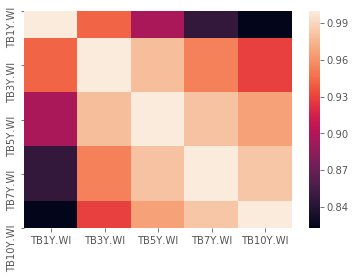

In [15]:
import seaborn as sns
sns.heatmap(idf.corr())

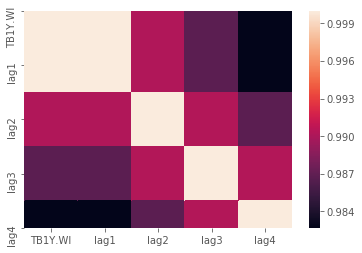

In [16]:
s1=idf[['TB1Y.WI']]
for i in range(4):
    s1["lag{}".format(i+1)]=idf['TB1Y.WI'].shift(i).astype('float')
s1.dropna(inplace=True)
s1.corr()
sns.heatmap(s1.corr())

Text(0.5, 1.0, 'For whole picture')

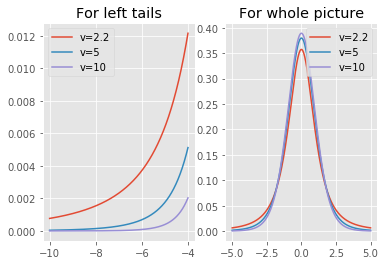

In [17]:
# t-distribution
import matplotlib.pyplot as plt

plt.subplot(121)
x=np.linspace(-10,-4,1000)
y=stats.t.pdf(x,df=2.2, loc=0, scale=1)
y2=stats.t.pdf(x,df=5, loc=0, scale=1)
y3=stats.t.pdf(x,df=10, loc=0, scale=1)
plt.plot(x,y,x,y2,x,y3)
plt.legend(["v=2.2","v=5","v=10"])
plt.title("For left tails")

plt.subplot(122)
x=np.linspace(-5,5,1000)
y=stats.t.pdf(x,df=2.2, loc=0, scale=1)
y2=stats.t.pdf(x,df=5, loc=0, scale=1)
y3=stats.t.pdf(x,df=10, loc=0, scale=1)
plt.plot(x,y,x,y2,x,y3)
plt.legend(["v=2.2","v=5","v=10"])
plt.title("For whole picture")

In [18]:
import scipy.stats as stats
stats.t.std(df=4)

1.4142135623730951

In [19]:
mysig(4)

1.4142135623730951

In [20]:
myr=stats.t.rvs(4, loc=0, scale=1, size=1, random_state=None)

In [21]:
mean, var, skew, kurt = stats.t.stats(df=5, moments='mvsk')
print(mean,var,skew,kurt)

0.0 1.6666666666666667 0.0 6.0


In [22]:
# stats for norm-distribution
mean,var,skew,kurt=stats.norm.stats(loc=1,scale=2,moments='mvsk')
print(mean,var,skew,kurt)

# stats for t-distribution
mean, var, skew, kurt = stats.t.stats(df=5, moments='mvsk')
print(mean,var,skew,kurt)

# ppf(q, df, loc=0, scale=1)
# Percent point function (inverse of cdf — percentiles).
## for t
vals = stats.t.ppf([0.001, 0.01,0.05,0.1, 0.999], df=5,loc=0,scale=1)
print(vals)
vals=stats.norm.ppf([0.001,0.01, 0.05,0.1, 0.999],loc=0,scale=1)
print(vals)

1.0 4.0 0.0 0.0
0.0 1.6666666666666667 0.0 6.0
[-5.89342953 -3.36493    -2.01504837 -1.47588405  5.89342953]
[-3.09023231 -2.32634787 -1.64485363 -1.28155157  3.09023231]


In [23]:

def myvar(df_input, alphas=[0.01, 0.05], method="all", tell=True):
    if method not in ["all", "norm", "t", "historical"]:
        print("Fail: wrong method! Please use one of the following method:")
        for i in ["all", "norm", "t", "historical"]:
            print(i)
        return "Error"
    import matplotlib.pyplot as plt
    import matplotlib.style as style
    import scipy.stats as stats
    import numpy as np

    alphas = np.array(alphas)

    palphas = [item * 100 for item in alphas]

    df_input = np.array(df_input)
    if df_input.ndim > 1:
        if df_input.shape[0] > 1:
            df_input = df_input[:, 0]
        else:
            df_input = df_input[0, :]

    # parametric method with norm distribution
    # Analytic Approach
    if method == "norm" or method == "all":
        nloc, nscale = stats.norm.fit(df_input)
        vars = stats.norm.ppf(alphas, loc=nloc, scale=nscale)
        if tell == True or method == "all":
            print("Use Norm-Distribution model:")
            for var, alpha in zip(vars, alphas):
                print("Var {}: \t{} ".format(alpha, var))

        if method != "all":
            return vars

    # parametric method with t location-scale distribution
    # fit the data with a t location-scale model with MLE
    ## r=loc + scale * T(dof)

    if method == "t" or method == "all":
        tdof, tloc, tscale = stats.t.fit(df_input)
        vars = stats.t.ppf(alphas, df=tdof, loc=tloc, scale=tscale)
        if tell == True or method == "all":
            print("Use t location-scale model:")
            for var, alpha in zip(vars, alphas):
                print("Var {}: \t{} ".format(alpha, var))

        if method != "all":
            return vars

    # historical method
    if method == "historical" or method == "all":
        vars = np.percentile(df_input, palphas)
        if tell == True or method == "all":
            print("Use Historical Approach:")
            for var, alpha in zip(vars, alphas):
                print("Var {}: \t{} ".format(alpha, var))
        if method != "all":
            return vars


In [24]:
myvar(idiff['TB10Y.WI'])

Use Norm-Distribution model:
Var 0.01: 	-0.0733910278130411 
Var 0.05: 	-0.05196230956627681 
Use t location-scale model:
Var 0.01: 	-0.08451370098561058 
Var 0.05: 	-0.048294670178378934 
Use Historical Approach:
Var 0.01: 	-0.08370000000000033 
Var 0.05: 	-0.04750000000000029 


In [25]:
myvar(idiff['TB5Y.WI'])

Use Norm-Distribution model:
Var 0.01: 	-0.11864227553287926 
Var 0.05: 	-0.08396917014675072 
Use t location-scale model:
Var 0.01: 	-0.1499063283095125 
Var 0.05: 	-0.07392116257121466 
Use Historical Approach:
Var 0.01: 	-0.14750000000000033 
Var 0.05: 	-0.07120000000000015 


In [26]:
myvar(idiff['TB3Y.WI'])

Use Norm-Distribution model:
Var 0.01: 	-0.11458168703217385 
Var 0.05: 	-0.08109166659748163 
Use t location-scale model:
Var 0.01: 	-0.15459042357324865 
Var 0.05: 	-0.07181667293574849 
Use Historical Approach:
Var 0.01: 	-0.1359250000000002 
Var 0.05: 	-0.0725000000000002 


In [27]:
myvar(idiff[idiff.index.year==2015]['TB1Y.WI'])

Use Norm-Distribution model:
Var 0.01: 	-0.18240104952934888 
Var 0.05: 	-0.13000568569338006 
Use t location-scale model:
Var 0.01: 	-0.23626590750135543 
Var 0.05: 	-0.10747903977900909 
Use Historical Approach:
Var 0.01: 	-0.1877999999999999 
Var 0.05: 	-0.10899999999999999 


In [28]:
myvar(idiff[idiff.index.year==2016]['TB1Y.WI'])

Use Norm-Distribution model:
Var 0.01: 	-0.1328479645481472 
Var 0.05: 	-0.0933986279951231 
Use t location-scale model:
Var 0.01: 	-0.18141704503300887 
Var 0.05: 	-0.07446534006962394 
Use Historical Approach:
Var 0.01: 	-0.15427499999999997 
Var 0.05: 	-0.0667499999999999 


In [29]:
myvar(idiff[idiff.index.year==2017]['TB1Y.WI'])

Use Norm-Distribution model:
Var 0.01: 	-0.1372432466965194 
Var 0.05: 	-0.09594750323877804 
Use t location-scale model:
Var 0.01: 	-0.21969402910024222 
Var 0.05: 	-0.0790960799362745 
Use Historical Approach:
Var 0.01: 	-0.21164400000000003 
Var 0.05: 	-0.07575000000000015 


In [48]:
# Instead of using yearly data, we use rolling of last 50 days' data to predict the VAR
var_rolling_t=idiff.rolling(window=100,min_periods=100).apply(lambda t: myvar(t,alphas=[0.05],method='t',tell=False)[0])
var_rolling_n=idiff.rolling(window=100,min_periods=100).apply(lambda t: myvar(t,alphas=[0.05],method='norm',tell=False)[0])
std_rolling_n=idiff.rolling(window=100,min_periods=100).std()

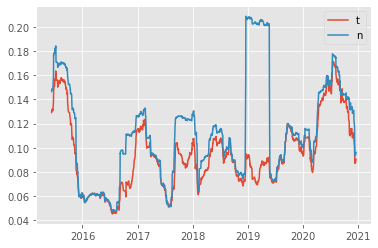

In [49]:
import matplotlib.pyplot as plt
plt.plot(-var_rolling_t['TB1Y.WI'])
plt.plot(-var_rolling_n['TB1Y.WI'])
# plt.plot(std_rolling_n['TB1Y.WI'])
plt.legend(['t','n','std'])

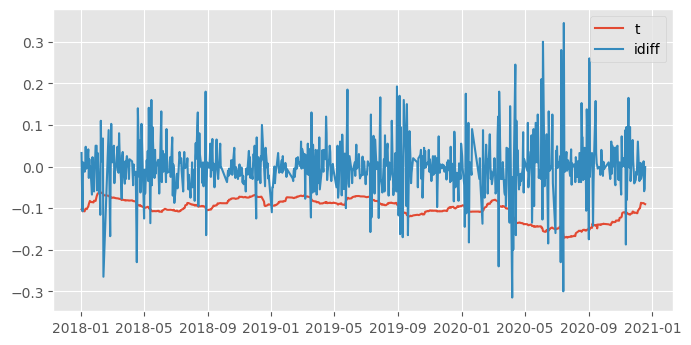

In [64]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import scipy.stats as stats
import numpy as np



style.use("ggplot")
plt.rcParams["figure.figsize"] = (8, 4)
plt.figure(dpi=100)

# plt.plot(var_rolling_t[var_rolling_t.index.year>2018])
# plt.plot(var_rolling_n[var_rolling_n.index.year>2018]['TB1Y.WI'])
plt.plot(var_rolling_t[var_rolling_t.index.year>2017]['TB1Y.WI'])
# plt.plot(mvar_rollint_t[mvar_rollint_t.index.year>2017])
# plt.plot(mvar_rollint_n[mvar_rollint_n.index.year>2017])
plt.plot(idiff[idiff.index.year>2017]['TB1Y.WI'])
# plt.plot(std_rolling_n)
plt.legend(['t','idiff'])


In [32]:
# Back-testing
## t-model
import scipy.stats as stats
for nyear in idiff.index.year.drop_duplicates('first').to_list()[1:]:
    print("for year {}:".format(nyear))
    realprob_t=(idiff<var_rolling_t.shift(1)).loc[var_rolling_t.shift(1).dropna().index,'TB1Y.WI']
    tmean=realprob_t[realprob_t.index.year==nyear].mean()

    print("For t model:\nP(loss < Var_005) = {:.4f}".format(tmean))
    bn=realprob_t[realprob_t.index.year==nyear].count()
    bx=realprob_t[realprob_t.index.year==nyear].sum()
    print("bx={},bn={}".format(bx,bn))
    bp=stats.binom_test(bx,bn,p=0.05)
    print("p-value = {:.4f}".format(bp))
    ## norm-model
    realprob_n=(idiff<var_rolling_n.shift(1)).loc[var_rolling_n.shift(1).dropna().index,'TB1Y.WI']
    nmean=realprob_n[realprob_n.index.year==nyear].mean()
    print("For norm model:\nP(loss < Var_005) = {:.4f}".format(nmean))
    bn=realprob_n[realprob_n.index.year==nyear].count()
    bx=realprob_n[realprob_n.index.year==nyear].sum()
    bp=stats.binom_test(bx,bn,p=0.05)
    print("p-value = {:.4f}".format(bp))

    ## binomial test
    ## scipy.stats.binom_test(x, n=None, p=0.5, alternative='two-sided')
    ## x: the number of sucess
    ## n: number of trials
    ## return the p value (two sided)
   

for year 2016:
For t model:
P(loss < Var_005) = 0.0452
bx=10,bn=221
p-value = 0.8776
For norm model:
P(loss < Var_005) = 0.0452
p-value = 0.8776
for year 2017:
For t model:
P(loss < Var_005) = 0.0544
bx=13,bn=239
p-value = 0.7653
For norm model:
P(loss < Var_005) = 0.0418
p-value = 0.6575
for year 2018:
For t model:
P(loss < Var_005) = 0.0420
bx=10,bn=238
p-value = 0.7649
For norm model:
P(loss < Var_005) = 0.0420
p-value = 0.7649
for year 2019:
For t model:
P(loss < Var_005) = 0.0494
bx=12,bn=243
p-value = 1.0000
For norm model:
P(loss < Var_005) = 0.0165
p-value = 0.0115
for year 2020:
For t model:
P(loss < Var_005) = 0.0779
bx=18,bn=231
p-value = 0.0672
For norm model:
P(loss < Var_005) = 0.0779
p-value = 0.0672


In [65]:
realprob_t=(idiff<var_rolling_n.shift(1)).loc[var_rolling_n.shift(1).dropna().index]
tmean=realprob_t[realprob_t.index.year>2017].mean()


ValueError: Can only compare identically-labeled DataFrame objects

In [47]:
tmean

TB1Y.WI     0.077922
TB3Y.WI     0.060606
TB5Y.WI     0.056277
TB7Y.WI     0.090909
TB10Y.WI    0.056277
dtype: float64